In [1]:
using JuMP, Clp, LinearAlgebra, Plots

In [2]:
## Constants
T = 100;
delta = .001;
f = 1000;
d = 50;
c = 1;

## Model
rocket_model = Model(Clp.Optimizer)

## Variables
@variables(
    rocket_model,
    begin
        x[1:T]
        v[1:T]
        a[1:T]
        a_hat[1:T]
        z
    end
)

## Objective
@objective(rocket_model,Min,z);

## Constraints
@constraints(
    rocket_model,
    begin
        [t = 1:T-1], v[t+1] == v[t] + a[t]
        [t = 1:T-1], x[t+1] == x[t] + v[t]
        x[1] == 0
        v[1] == 0
        x[T] == d
        v[T] == 0
        [t = 1:T], a[t] <= a_hat[t]
        [t = 1:T], -a[t] <= a_hat[t]
        sum(c*a_hat[t] for t in 1:T) <= f
        [t = 1:T-1], a[t+1]-a[t] <= delta
        [t = 1:T-1], a[t]-a[t+1] <= delta 
        [t = 1:T], a[t] <= z
        [t = 1:T], -a[t] <= z
    end
)

## Optimize
optimize!(rocket_model)

Coin0506I Presolve 643 (-158) rows, 243 (-158) columns and 1577 (-317) elements
Clp0006I 0  Obj 0 Primal inf 1229.1373 (7) Dual inf 0.0082850669 (1) w.o. free dual inf (0)
Clp0006I 68  Obj 1.7221316e-16 Primal inf 3.8630718 (17)
Clp0006I 130  Obj 2.5920038e-16 Primal inf 47.298084 (10)
Clp0006I 202  Obj 0.044947993 Primal inf 2.3096975 (69)
Clp0006I 258  Obj 0.41221429 Primal inf 3.5135943 (19)
Clp0006I 264  Obj 3.115931 Primal inf 8.1475538 (22)
Clp0006I 310  Obj 44.056 Primal inf 135.3529 (3)
Clp0006I 310  Obj 44.056 Primal inf 135.3529 (3)
Clp0006I 384  Obj -4.7249994e+12 Primal inf 6.6448068e+14 (93) Dual inf 5.3766826e-13 (15)
Clp0006I 384  Obj 8.5464688e+13 Primal inf 5.9032471e+14 (93) Dual inf 2.9042729e+15 (58) w.o. free dual inf (30)
Clp0006I 417  Obj 0 Primal inf 8.7165031 (138) Dual inf 1.1913143e+16 (90)
Clp0006I 486  Obj 0.032907302 Primal inf 0.29593831 (22) Dual inf 2.2396909e+15 (75)
Clp0006I 562  Obj 0.029404301 Dual inf 14.16514 (51)
Clp0006I 611  Obj 0.023533578 Dua

In [3]:
## Optimal objective value
p_star = objective_value(rocket_model)

0.021819919516018697

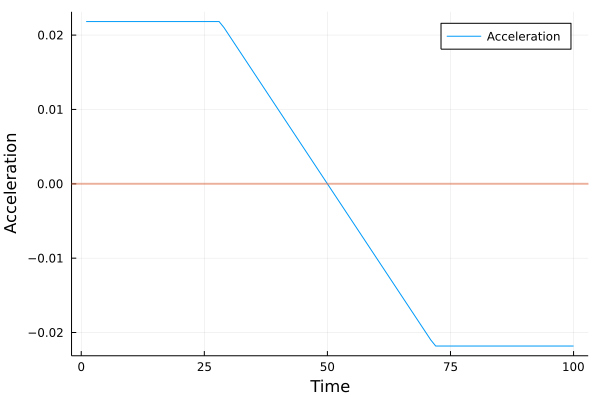

In [4]:
plot([1:T],value.(a),label = "Acceleration",xlabel = "Time",ylabel = "Acceleration")
hline!([0],width = 2,alpha = 0.5,label = "")

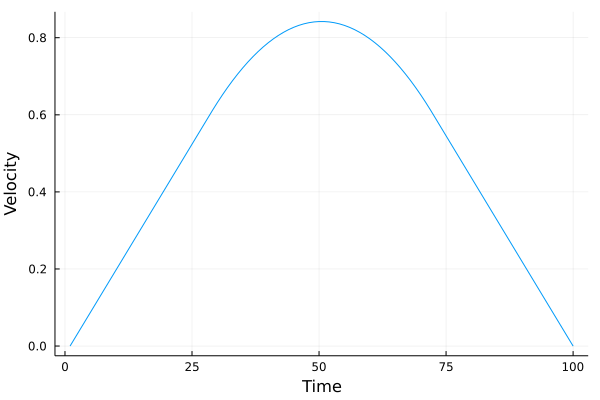

In [5]:
plot([1:T],value.(v),label = "",xlabel = "Time",ylabel = "Velocity")

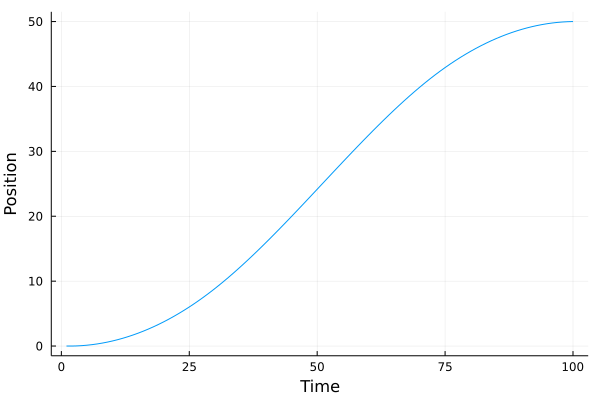

In [6]:
plot([1:T],value.(x),label = "",xlabel = "Time",ylabel = "Position")